# Twitter trends analysis

First of all let's install libraries that we will need to make project work..

In [ ]:
%pip install matplotlib
%pip install pandas

## 1. Local and global thought patterns
While Twitter might not be the most popular social network in Ukraine, it's important to remember that it has a huge influence on the world. Twitter is actively used by Western politicians, businesspeople, and celebrities. Twitter data is not only gold in terms of insights. This means we can learn about the big waves of thoughts and moods around the world.

Twitter data offers a unique opportunity to study current global sentiments and events in real-time. This allows us to understand not only individual opinions but also broader societal trends. Therefore, analysis will help us dive into this dynamic world and gain interesting insights.

However, to access Twitter data, authentication is required to make requests through the API. In our analysis, we will use outdated data, but it still provides valuable insights.




In [1]:
import json

# Loading WW_trends and US_trends data 
with open('datasets/WWTrends.json', 'r') as file:
    WW_trends = json.loads(file.read())
with open('datasets/USTrends.json', 'r') as file:
    US_trends = json.loads(file.read()) 

# Inspecting data by printing out WW_trends and US_trends variables
print(WW_trends)
print(US_trends)

[{'trends': [{'name': '#BeratKandili', 'url': 'http://twitter.com/search?q=%23BeratKandili', 'promoted_content': None, 'query': '%23BeratKandili', 'tweet_volume': 46373}, {'name': '#GoodFriday', 'url': 'http://twitter.com/search?q=%23GoodFriday', 'promoted_content': None, 'query': '%23GoodFriday', 'tweet_volume': 81891}, {'name': '#WeLoveTheEarth', 'url': 'http://twitter.com/search?q=%23WeLoveTheEarth', 'promoted_content': None, 'query': '%23WeLoveTheEarth', 'tweet_volume': 159698}, {'name': '#195TLdenTTVerilir', 'url': 'http://twitter.com/search?q=%23195TLdenTTVerilir', 'promoted_content': None, 'query': '%23195TLdenTTVerilir', 'tweet_volume': None}, {'name': '#AFLNorthDons', 'url': 'http://twitter.com/search?q=%23AFLNorthDons', 'promoted_content': None, 'query': '%23AFLNorthDons', 'tweet_volume': None}, {'name': 'Shiv Sena', 'url': 'http://twitter.com/search?q=%22Shiv+Sena%22', 'promoted_content': None, 'query': '%22Shiv+Sena%22', 'tweet_volume': None}, {'name': 'Lyra McKee', 'url': 

## 2. Prettifying the output
Our data is hard to read! So, lets resort to the json.dumps() method to have it formatted as a pretty JSON string

In [2]:
# Pretty-printing the results of WW trends 

print("WW trends:")
json.dumps(WW_trends)

WW trends:


'[{"trends": [{"name": "#BeratKandili", "url": "http://twitter.com/search?q=%23BeratKandili", "promoted_content": null, "query": "%23BeratKandili", "tweet_volume": 46373}, {"name": "#GoodFriday", "url": "http://twitter.com/search?q=%23GoodFriday", "promoted_content": null, "query": "%23GoodFriday", "tweet_volume": 81891}, {"name": "#WeLoveTheEarth", "url": "http://twitter.com/search?q=%23WeLoveTheEarth", "promoted_content": null, "query": "%23WeLoveTheEarth", "tweet_volume": 159698}, {"name": "#195TLdenTTVerilir", "url": "http://twitter.com/search?q=%23195TLdenTTVerilir", "promoted_content": null, "query": "%23195TLdenTTVerilir", "tweet_volume": null}, {"name": "#AFLNorthDons", "url": "http://twitter.com/search?q=%23AFLNorthDons", "promoted_content": null, "query": "%23AFLNorthDons", "tweet_volume": null}, {"name": "Shiv Sena", "url": "http://twitter.com/search?q=%22Shiv+Sena%22", "promoted_content": null, "query": "%22Shiv+Sena%22", "tweet_volume": null}, {"name": "Lyra McKee", "url":

In [3]:
# Pretty-printing the results of US trends 

print("\n", "US trends:")
json.dumps(US_trends,indent=1 )


 US trends:


'[\n {\n  "trends": [\n   {\n    "name": "#WeLoveTheEarth",\n    "url": "http://twitter.com/search?q=%23WeLoveTheEarth",\n    "promoted_content": null,\n    "query": "%23WeLoveTheEarth",\n    "tweet_volume": 159698\n   },\n   {\n    "name": "#DragRace",\n    "url": "http://twitter.com/search?q=%23DragRace",\n    "promoted_content": null,\n    "query": "%23DragRace",\n    "tweet_volume": 37166\n   },\n   {\n    "name": "Lil Dicky",\n    "url": "http://twitter.com/search?q=%22Lil+Dicky%22",\n    "promoted_content": null,\n    "query": "%22Lil+Dicky%22",\n    "tweet_volume": 42461\n   },\n   {\n    "name": "Derrick White",\n    "url": "http://twitter.com/search?q=%22Derrick+White%22",\n    "promoted_content": null,\n    "query": "%22Derrick+White%22",\n    "tweet_volume": 27104\n   },\n   {\n    "name": "#CUZILOVEYOU",\n    "url": "http://twitter.com/search?q=%23CUZILOVEYOU",\n    "promoted_content": null,\n    "query": "%23CUZILOVEYOU",\n    "tweet_volume": null\n   },\n   {\n    "name":

## 3.  Finding common trends

From the pretty-printed results, we can observe that:

We have an array of trend objects, each containing the following information: the name of the trending topic, a query parameter for searching the topic on Twitter, the search URL, and the tweet volume over the last 24 hours, if available. Note that trends are updated every 5 minutes.

At the time of the query, #BeratKandili, #GoodFriday, and #WeLoveTheEarth were trending worldwide. The "tweet_volume" indicates that #WeLoveTheEarth had the highest popularity among these three trends.

The trends are not sorted by "tweet_volume."

There are some trends which are unique to the US.

Rather than manually comparing the trends, we can leverage Python's set data structure to identify common trends. By iterating through the two sets of trend objects, converting the lists of trend names to sets, and using the intersection method, we can efficiently find the common trends between the two sets.

In [4]:
# Extracting all the WW trend names and tweet volumes from WW_trends
world_trends = {trend['name']: trend.get('tweet_volume', 0) or 0 for trend in WW_trends[0]['trends']}

# Extracting all the US trend names and tweet volumes from US_trends
us_trends = {trend['name']: trend.get('tweet_volume', 0) or 0 for trend in US_trends[0]['trends']}

# Getting the intersection of the two sets of trends
common_trends = set(world_trends.keys()).intersection(us_trends.keys())

# Extracting the common trends with their tweet volumes
common_trends_data = {
    trend: min(world_trends.get(trend, 0), us_trends.get(trend, 0))  # Use min to avoid discrepancies
    for trend in common_trends
}

# Printing trends with tweet_volume
print("Worldwide trends with tweet volumes:\n", world_trends, "\n")
print("US trends with tweet volumes:\n", us_trends, "\n")

print("\nTotal number of common trends:", len(common_trends))
for trend, volume in common_trends_data.items():
    print(f"{trend}")



Worldwide trends with tweet volumes:
 {'#BeratKandili': 46373, '#GoodFriday': 81891, '#WeLoveTheEarth': 159698, '#195TLdenTTVerilir': 0, '#AFLNorthDons': 0, 'Shiv Sena': 0, 'Lyra McKee': 17606, 'Priyanka Chaturvedi': 22342, 'Derry': 28234, '池袋の事故': 34381, 'プリウス': 22944, 'Hemant Karkare': 24067, '高齢者': 28382, '브이알': 15490, '刀ステ': 0, '免許返納': 0, 'Berat Kandilimiz': 10901, 'örgütdeğil arkadaşgrubu': 0, 'グレア': 23485, '東京・池袋衝突事故': 0, '重体の女性と女児': 0, 'Lil Dicky': 42461, '歩行者': 25405, 'Derrick White': 27104, '十二国記': 46803, '#KpuJanganCurang': 75384, '#HayırlıCumalar': 19848, '#HayırlıKandiller': 0, '#HanumanJayanti': 83138, '#IndonesianElectionHeroes': 19664, '#يوم_الجمعه': 80799, '#NRLBulldogsSouths': 0, '#NikahUmurBerapa': 0, '#DragRace': 37166, '#ViernesSanto': 0, '#HardikPatel': 0, '#BLACKPINKxCorden': 253605, '#Ontas': 27924, '#ConCalmaRemix': 37846, '#ProtestoEdiyorum': 0, '#DinahJane1': 23757, '#ShivSena': 0, '#DuyguAsena': 0, '#TheJudasInMyLife': 0, '#Jersey': 20509, '#اغلاق_BBM': 17055




Additionally, to enhance our understanding, let's visualize the trends we have obtained

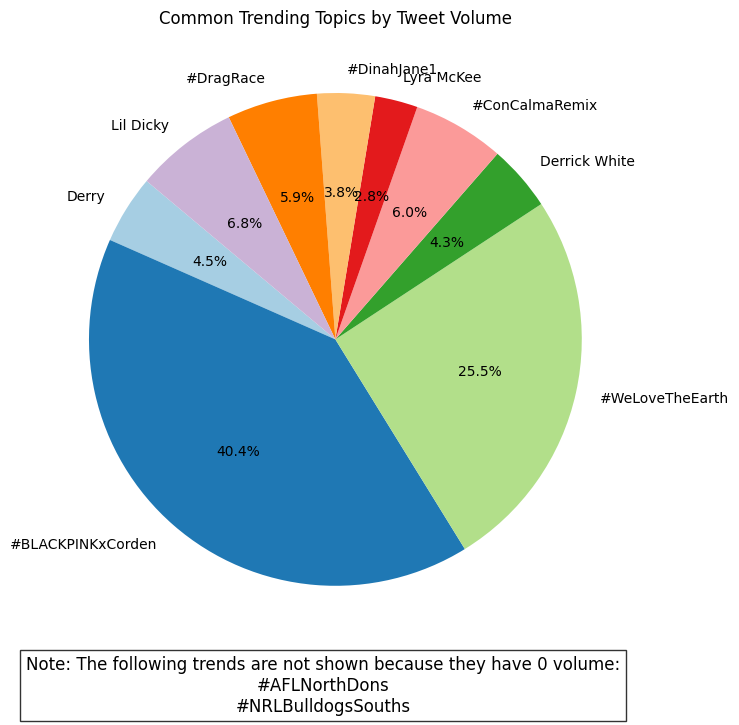

In [5]:
# Data for the pie chart (excluding trends with 0 volume)
filtered_trends_data = {trend: volume for trend, volume in common_trends_data.items() if volume > 0}
trend_names = list(filtered_trends_data.keys())
tweet_volumes = list(filtered_trends_data.values())

# Trends with zero volume to be noted
excluded_trends = [trend for trend, volume in common_trends_data.items() if volume == 0]

import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 8))
plt.pie(tweet_volumes, labels=trend_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(trend_names))))

# Add a title
plt.title('Common Trending Topics by Tweet Volume')

# Adding a note about excluded trends
if excluded_trends:
    note = "Note: The following trends are not shown because they have 0 volume:\n" + "\n".join(excluded_trends)
    plt.gcf().text(0.5, 0.1, note, ha='center', va='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

plt.show()

## 4. Exploring the hot trend

From the intersection of the two trend sets (each containing 50 items), we have 11 overlapping topics. Among these, one particularly intriguing trend is #WeLoveTheEarth — it's fantastic to see such a widespread discussion about cherishing our planet! 

Note: The degree of overlap could vary significantly; depending on the time of the query, trends in the US might focus on topics unique to their region.

We've pinpointed the trending hashtag #WeLoveTheEarth. Now, let's delve into what this trend is revealing! To explore this further, we'll query Twitter post using this hashtag. 
The response is saved in the datasets folder as 'WeLoveTheEarth.json'. Let’s load this dataset and take a closer look at the trend.

In [6]:
# Loading the data
with open('datasets/WeLoveTheEarth.json', 'r') as file:
    tweets = json.loads(file.read())
    
# Inspecting some tweets
tweets[0:2]

[{'created_at': 'Fri Apr 19 08:46:48 +0000 2019',
  'id': 1119160405270523904,
  'id_str': '1119160405270523904',
  'text': 'RT @lildickytweets: 🌎 out now #WeLoveTheEarth https://t.co/L22XsoT5P1',
  'truncated': False,
  'entities': {'hashtags': [{'text': 'WeLoveTheEarth', 'indices': [30, 45]}],
   'symbols': [],
   'user_mentions': [{'screen_name': 'lildickytweets',
     'name': 'LD',
     'id': 1209516660,
     'id_str': '1209516660',
     'indices': [3, 18]}],
   'urls': [{'url': 'https://t.co/L22XsoT5P1',
     'expanded_url': 'https://youtu.be/pvuN_WvF1to',
     'display_url': 'youtu.be/pvuN_WvF1to',
     'indices': [46, 69]}]},
  'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
  'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 212

## 5. Digging deeper
Printing the first two tweet items reveals that there’s much more to a tweet than just the short text we usually think of. Each tweet object contains a wealth of additional information!

But don’t worry, we won’t get overwhelmed by all the details. Let’s concentrate on a few key fields and see if we can uncover any hidden insights.

In [7]:
# Extracting the text of all the tweets from the tweet object
texts = [tweet['text'] for tweet in tweets]

# Extracting screen names of users tweeting about #WeLoveTheEarth
names = [ user_mention['screen_name'] 
         for tweet in tweets 
         for user_mention in tweet['entities']['user_mentions']]

# Extracting all the hashtags being used when talking about this topic
hashtags = [hashtag['text'] 
            for tweet in tweets 
            for hashtag in tweet['entities']['hashtags']]

# Inspecting the first 10 results
print (json.dumps(texts[0:10], indent=1),"\n")
print (json.dumps(names[0:10], indent=1),"\n")
print (json.dumps(hashtags[0:10], indent=1),"\n")

[
 "RT @lildickytweets: \ud83c\udf0e out now #WeLoveTheEarth https://t.co/L22XsoT5P1",
 "\ud83d\udc9a\ud83c\udf0e\ud83d\udc9a  #WeLoveTheEarth \ud83d\udc47\ud83c\udffc",
 "RT @cabeyoomoon: Ta piosenka to bop,  wpada w ucho  i dochody z niej id\u0105 na dobry cel,  warto s\u0142ucha\u0107 w k\u00f3\u0142ko i w k\u00f3\u0142ko gdziekolwiek si\u0119 ty\u2026",
 "#WeLoveTheEarth \nCzemu ja si\u0119 pop\u0142aka\u0142am",
 "RT @Spotify: This is epic. @lildickytweets got @justinbieber, @arianagrande, @halsey, @sanbenito, @edsheeran, @SnoopDogg, @ShawnMendes, @Kr\u2026",
 "RT @biebercentineo: Justin : are we gonna die? \nLil dicky: you know bieber we might die \n\nBTCH IM CRYING #EARTH #WeLoveTheEarth #WELOVEEART\u2026",
 "RT @dreamsiinflate: #WeLoveTheEarth \u201ci am a fat fucking pig\u201d okay brendon urie https://t.co/FdJmq31xZc",
 "Literally no one:\n\nMe in the past 4 hours:\n\nI'm a koala and I sleep all the time, so what, it's cute \ud83c\udfb6\n\n#WeLoveTheEarth #EdSheeranTheKoala",

## 6. Frequency analysis

From the first few results of the latest extraction, we can deduce that:

--The topic revolves around a song promoting love for the Earth. 

--Several major artists, especially Lil Dicky, are driving this Twitter wave.

--Ed Sheeran is featured as a cute koala in the song, highlighted by the hashtag "EdSheeranTheKoala".

By examining the first 10 items of the interesting fields, we gained an initial understanding of the data. Now, we can delve deeper with a simple yet powerful technique: computing frequency distributions. Starting with basic frequency analysis is a great way to generate ideas for further exploration.

In [8]:
# Importing modules
from collections import Counter

# Counting occcurrences/ getting frequency dist of all names and hashtags
for item in [names, hashtags]:
    c = Counter(item) 
    # Inspecting the 10 most common items in c
    print (c.most_common(10), "\n")

[('lildickytweets', 102), ('LeoDiCaprio', 44), ('ShawnMendes', 33), ('halsey', 31), ('ArianaGrande', 30), ('justinbieber', 29), ('Spotify', 26), ('edsheeran', 26), ('sanbenito', 25), ('SnoopDogg', 25)] 

[('WeLoveTheEarth', 313), ('4future', 12), ('19aprile', 12), ('EARTH', 11), ('fridaysforfuture', 10), ('EarthMusicVideo', 3), ('ConCalmaRemix', 3), ('Earth', 3), ('aliens', 2), ('AvengersEndgame', 2)] 



## 7. Activity around the trend
Based on the latest frequency distributions, we can further build upon our deductions:

 --It is more evident that this was a music video about Earth (hashtag 'EarthMusicVideo') by Lil Dicky.

 --Leonardo DiCaprio, although not a music artist, was involved as well. Given his reputation as an environmentalist, it's not surprising to see his name associated with this project. The video was likely released on a Friday, probably on April 19th.

 --These insights are quite powerful! Now, let's delve deeper into the data to uncover patterns in the tweet activity. Specifically, we want to know if all retweets occurred around a particular tweet.

When a tweet is retweeted, the 'retweeted_status' field contains many interesting details about the original tweet and its author. We can measure a tweet's popularity by analyzing the retweet_count and favorite_count fields. Additionally, let's extract the number of followers of the original tweeter. With many celebrities involved, we can determine if their advocacy for #WeLoveTheEarth significantly influenced their followers.

Note: The retweet_count field gives us the total number of times the original tweet was retweeted. This count should be consistent across the original tweet and all subsequent retweets. Exploring some sample tweets and the official documentation is a great way to understand the various fields.

In [9]:
# Extracting useful information from retweets
retweets = [
    (
        tweet['retweet_count'],
        tweet['retweeted_status']['favorite_count'],
        tweet['retweeted_status']['user']['followers_count'],
        tweet['retweeted_status']['user']['screen_name'],
        tweet['text']
    )
    for tweet in tweets if 'retweeted_status' in tweet
]

## 8. A table that speaks a 1000 words
Let's further manipulate the data and visualize it in a more engaging and informative way—because presentation is key!

In [10]:
import pandas as pd
# Creating a DataFrame and visualizing the data in a pretty and insightful format

df = pd.DataFrame(
    retweets,
    columns=['Retweets', 'Favorites', 'Followers', 'ScreenName', 'Text']
).groupby(['ScreenName', 'Text', 'Followers']).sum().sort_values(by='Followers', ascending=False)

df.style.background_gradient()

## 9. Analyzing used languages

Our table reveals the following insights:

--Lil Dicky's followers reacted the most, with 42.4% of his followers liking his first tweet.

--Despite having a huge Twitter following, celebrities like Katy Perry and Ellen saw minimal engagement; for instance, only 0.0098% of Katy's followers liked her tweet.

--Although Leo received the highest counts of likes and retweets, only 2.19% of his followers liked his first tweet.

--The large differences in reactions can be attributed to the fact that this was Lil Dicky's music video. Leo still garnered more traction than Katy or Ellen, likely due to his significant role in this initiative.

Can we uncover more interesting patterns in the data? From the text of the tweets, we can identify different languages, so let's create a frequency distribution for the languages.

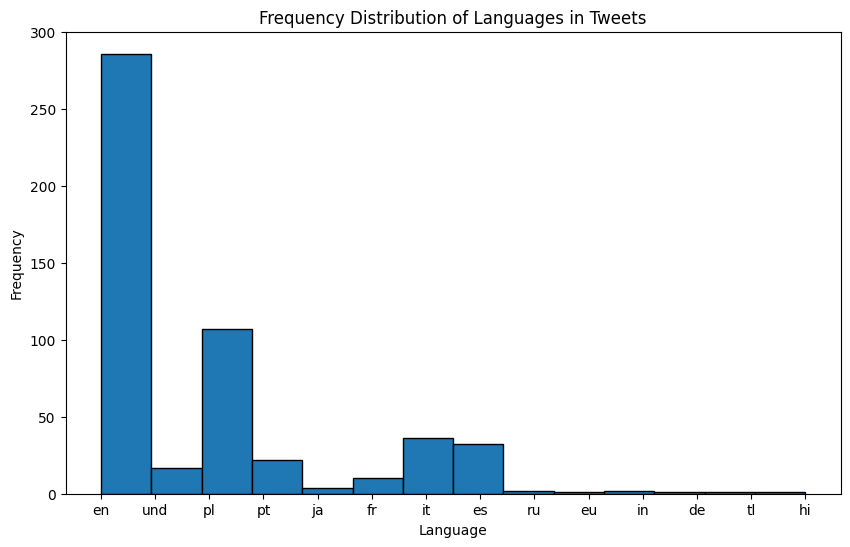

In [11]:
import matplotlib.pyplot as plt

# Extracting language for each tweet and appending it to the list of languages
tweets_languages = []
for tweet in tweets:
    if 'lang' in tweet:
        tweets_languages.append(tweet['lang'])

# Plotting the distribution of languages
plt.figure(figsize=(10, 6))
plt.hist(tweets_languages, bins=len(set(tweets_languages)), edgecolor='black')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Languages in Tweets')
plt.show()


## 10. Summary on Frequency Distribution of Languages

The histogram of language frequency distribution reveals several important trends:

English Dominance:
English is the predominant language used in tweets, indicating its widespread use among the audience. This highlights the significant role of English in tweet communication.

Top Non-English Languages:
Polish, Italian, and Spanish follow as the most frequently used non-English languages. This suggests a diverse linguistic audience, with these languages representing substantial portions of tweet content.

Unspecified Language:
A notable number of tweets are classified with an unspecified language (lang = 'und'), reflecting a significant portion of tweets lacking clear language identification.

Understanding the distribution of languages helps us grasp the diversity of the audience engaging with the content, offering insights into user demographics and potential clustering trends.



## 11. Analysing used devices

Devices used for tweeting can reveal intriguing patterns about how people interact with the platform. Different devices might influence tweeting habits, content engagement, and user preferences.
Exploring this data will shed light on the technological landscape behind Twitter activity and how it shapes user experiences.

Now, let’s dive deeper to uncover which devices users are using to post their tweets.

May we will find something like this?

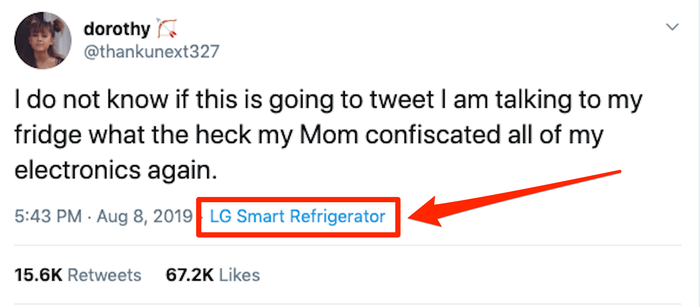


## 12. Getting divices 

First, let's extract the device information from tweet['source'] and clean it up. We don't need the full names like "Twitter for Android" or "Twitter Web Client." Additionally, devices such as "Falcon Social Media Management," "Bot Libre!," and "IFTTT," will be categorized under "Other," as they are not typical tweeting devices, like a refrigerator. Our goal is to simplify these device names to provide a clearer picture of the commonly used devices. 

After cleaning the device names, we will then calculate the frequency distribution.

In [12]:
import re

# Extract and clean device type
def extract_device(source):
    match = re.search(r'>([^<]+)<', source)
    device = match.group(1) if match else "Unknown"
    # Remove "Twitter for" and "Twitter" prefixes
    device = device.replace("Twitter for ", "").replace("Twitter ", "")
    # Filter out unwanted device names
    if device in {"Falcon Social Media Management ", "Bot Libre!", "IFTTT"}:
        return "Other"  # Categorize as "Other" or you can choose to omit these entries
    return device

# Frequency Distribution
device_types = [extract_device(tweet['source']) for tweet in tweets]
device_freq = Counter(device_types)

# Print frequency distribution
print("Device Frequency Distribution:", device_freq)

# Print the first 10 'source' fields
for tweet in enumerate( WW_trends[:3]):
    print( WW_trends)
    print()  # Empty line for better readability

Device Frequency Distribution: Counter({'iPhone': 246, 'Android': 232, 'Web App': 20, 'Web Client': 19, 'Other': 3, 'iPad': 2})
[{'trends': [{'name': '#BeratKandili', 'url': 'http://twitter.com/search?q=%23BeratKandili', 'promoted_content': None, 'query': '%23BeratKandili', 'tweet_volume': 46373}, {'name': '#GoodFriday', 'url': 'http://twitter.com/search?q=%23GoodFriday', 'promoted_content': None, 'query': '%23GoodFriday', 'tweet_volume': 81891}, {'name': '#WeLoveTheEarth', 'url': 'http://twitter.com/search?q=%23WeLoveTheEarth', 'promoted_content': None, 'query': '%23WeLoveTheEarth', 'tweet_volume': 159698}, {'name': '#195TLdenTTVerilir', 'url': 'http://twitter.com/search?q=%23195TLdenTTVerilir', 'promoted_content': None, 'query': '%23195TLdenTTVerilir', 'tweet_volume': None}, {'name': '#AFLNorthDons', 'url': 'http://twitter.com/search?q=%23AFLNorthDons', 'promoted_content': None, 'query': '%23AFLNorthDons', 'tweet_volume': None}, {'name': 'Shiv Sena', 'url': 'http://twitter.com/search

## 13. Engagement by device 

For a more detailed analysis, it’s essential to understand how engagement varies by device.  By calculating these engagement metrics, we can uncover how different devices contribute to the overall interaction with the tweets.

In [13]:

# Analyzing Engagement
engagement = {device: {"retweets": 0, "count": 0} for device in device_freq.keys()}

for tweet in tweets:
    device = extract_device(tweet['source'])
    if device in engagement:  # Ensure only valid device types are considered
        engagement[device]['retweets'] += tweet['retweet_count']
        engagement[device]['count'] += 1

# Calculate average engagement per tweet for each device
for device, data in engagement.items():
    data['avg_retweets'] = data['retweets'] / data['count'] if data['count'] > 0 else 0

# Print engagement analysis
print("\nEngagement Analysis by Device:")
for device, data in engagement.items():
    print(f"{device}: {data}")



Engagement Analysis by Device:
Android: {'retweets': 204962, 'count': 232, 'avg_retweets': 883.4568965517242}
iPhone: {'retweets': 365935, 'count': 246, 'avg_retweets': 1487.540650406504}
Web Client: {'retweets': 16010, 'count': 19, 'avg_retweets': 842.6315789473684}
Web App: {'retweets': 41510, 'count': 20, 'avg_retweets': 2075.5}
iPad: {'retweets': 563, 'count': 2, 'avg_retweets': 281.5}
Other: {'retweets': 3, 'count': 3, 'avg_retweets': 1.0}


#### And Visualization

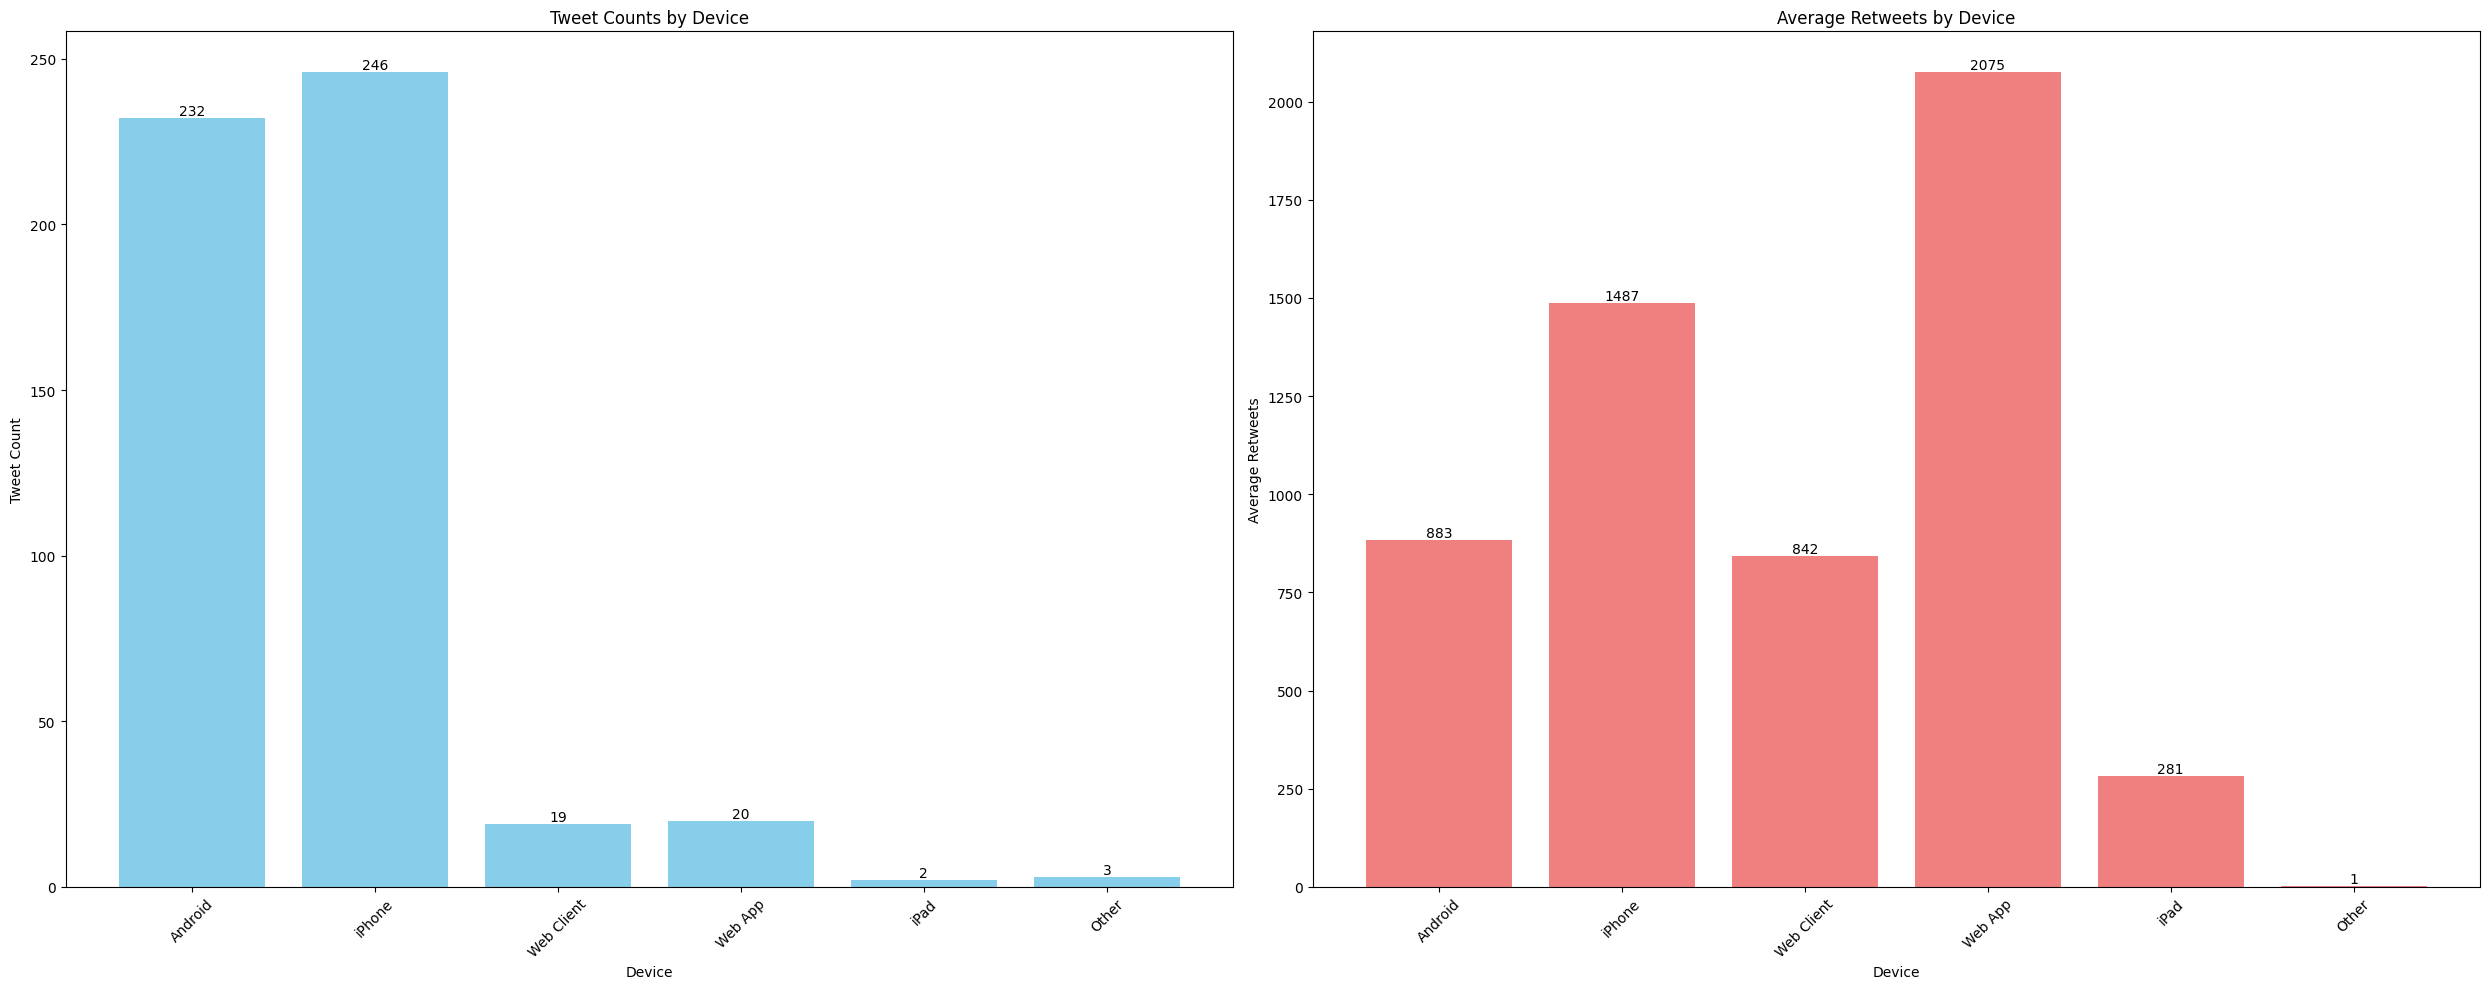

In [14]:
import matplotlib.pyplot as plt

# Your data
devices = list(device_freq.keys())
tweet_counts = [device_freq[device] for device in devices]
avg_retweets = [engagement[device]['avg_retweets'] for device in devices]

fig, ax = plt.subplots(1, 2, figsize=(25, 10))

# Plot 1: Tweet Counts by Device Type
bars1 = ax[0].bar(devices, tweet_counts, color='skyblue')
ax[0].set_title('Tweet Counts by Device')
ax[0].set_xlabel('Device')
ax[0].set_ylabel('Tweet Count')
ax[0].tick_params(axis='x', rotation=45)

# Add exact values on top of bars for Tweet Counts
for bar in bars1:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10)

# Plot 2: Average Retweets by Device Type
bars2 = ax[1].bar(devices, avg_retweets, color='lightcoral')
ax[1].set_title('Average Retweets by Device')
ax[1].set_xlabel('Device')
ax[1].set_ylabel('Average Retweets')
ax[1].tick_params(axis='x', rotation=45)

# Add exact values on top of bars for Average Retweets
for bar in bars2:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## 14. Key Insights on Device Engagement

##### Tweet Counts by Device

The chart shows that the iPhone leads significantly in tweet counts, indicating that it is the most popular device for tweeting among users. Following closely behind, the Android device also demonstrates high engagement, though it is slightly behind the iPhone. This suggests that while iPhone users are the most active, Android users also contribute substantially to tweet volumes.

##### Average Retweets by Device

In terms of average retweets, the Web App emerges as the top performer, indicating that tweets sent from web platforms receive the highest level of engagement in terms of retweets. The iPhone ranks second, showcasing its effectiveness not only in tweet counts but also in generating engagement through retweets. The Android device holds the third position, closely followed by the Web Client, highlighting that while Android users are competitive, web clients are almost on par with them in terms of retweet performance.

These insights suggest that while device preference influences tweet volume, engagement through retweets varies based on the platform used. The dominance of the Web App in retweets underscores the importance of web-based platforms in maximizing tweet engagement.


# Overall Conclusion

The Twitter trend analysis provides valuable insights into the dynamics of global and U.S. trends, language distribution, and device usage.

Intersection of Global and U.S. Trends:
The analysis identified an intersection between global and U.S. trends, with 11 overlapping topics such as #BLACKPINKxCorden, #DragRace, and #WeLoveTheEarth. This overlap demonstrates the widespread relevance of certain topics across different regions and suggests a shared global interest in these trends.

##### Language Distribution Insights
Focusing on the #WeLoveTheEarth trend, the language frequency distribution reveals:

--English Dominance: English remains the predominant language, indicating its central role in tweet communication.

--Top Non-English Languages: Polish, Italian, and Spanish are the leading non-English languages, reflecting a diverse global audience.

--Unspecified Language: A notable portion of tweets lack clear language identification (lang = 'und'), which suggests a gap in language classification.

Understanding these language patterns offers insights into the linguistic diversity of the audience and highlights areas where language classification could be improved.

##### Device Usage and Engagement
The analysis of engagement metrics for the #WeLoveTheEarth trend reveals distinct patterns:

--Tweet Counts by Device Type: The iPhone leads significantly in tweet counts, indicating it is the most popular device for tweeting about this trend. Android devices also show high engagement but are slightly behind the iPhone, suggesting strong participation from both iPhone and Android users.

--Average Retweets by Device Type: The Web App is the top performer in average retweets, indicating that tweets from web platforms receive the highest engagement in terms of retweets. The iPhone ranks second, demonstrating its effectiveness in generating both tweet counts and engagement. Android devices hold the third position, with the Web Client close behind.

These findings indicate that while device preferences affect tweet volume, engagement through retweets varies by platform, with web-based platforms being particularly effective for maximizing interaction.

Overall, the analysis of the #WeLoveTheEarth trend provides a thorough understanding of content distribution, language diversity, and engagement metrics, offering valuable insights into user behavior and interaction patterns on Twitter.
